# Lending Club: predicing creditworthiness

In [59]:
#import libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [60]:
# import raw data

df_raw = pd.read_csv('C:\\Users\sonja tilly.ABERDEEN\\LendingClub.csv', low_memory=False)

In [61]:
df_raw.describe()

,Loan Amount,Employment Length,Annual Income,Debt To Income Ratio,Earliest Credit Line Opened,FICO Credit Score,No. Inquiries In Last 6 Months,Months Since Last Delinquency,No. Of Credit Lines,Total Credit Balance,Use Of Credit Line,Total Number Of Credit Lines,Loan Application Description
count,24776.000000,24776.000000,24776.000000,24775.000000,24776.000000,24775.000000,24775.000000,24776.000000,24775.000000,24775.000000,24724.000000,24775.000000,24776.000000
mean,11115.051865,4.810119,67178.127238,13.233085,35647.665675,713.197982,0.952694,12.845899,9.429102,12488.257275,47.949507,22.584460,257.196359
std,7334.153775,3.528494,37288.333082,6.909056,2243.580467,36.435892,1.111826,21.556324,4.513058,12024.044982,28.529554,11.745806,295.285715
min,500.000000,0.000000,4000.000000,0.000000,30000.000000,625.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,2.000000,41000.000000,7.940000,34411.236115,685.000000,0.000000,0.000000,6.000000,3681.500000,24.200000,14.000000,0.000000
50%,10000.000000,4.000000,60000.000000,13.270000,36043.425690,705.000000,1.000000,0.000000,9.000000,8890.000000,48.300000,21.000000,153.000000
75%,15000.000000,8.000000,83000.000000,18.560000,37202.679688,740.000000,2.000000,21.000000,12.000000,17251.000000,71.700000,29.000000,379.000000
max,35000.000000,10.000000,200000.000000,34.980000,40075.198610,845.000000,8.000000,106.000000,49.000000,50000.000000,100.900000,90.000000,1000.000000


The dataset contains a mix of datatypes. 
The objects need to be converted into numerical values. 
The feature 'Class' will be the target and its values will be converted in '0' and '1'.

## Exploratory Data Analysis

In [62]:
# let's have a look at the target variable.

count = df_raw['Class'].value_counts()
count

Creditworthy      20274
Uncreditworthy     4502
Name: Class, dtype: int64

In [63]:
# convert 'Class' feature (=target) into numerical values

def credit_worthiness(status):
    if status == 'Creditworthy':
        return 0
    elif status == 'Uncreditworthy':
        return 1
    else:
        return status

df_raw['Class_new'] = df_raw['Class'].apply(credit_worthiness)


In [64]:
# calculate percentage
total = len(df_raw.index)
credit = df_raw['Class_new'].value_counts()

creditworthy = round((credit[0]/total)*100,2)
uncreditworthy = round((credit[1]/total)*100,2)
print(creditworthy)
print(uncreditworthy)

81.83
18.17


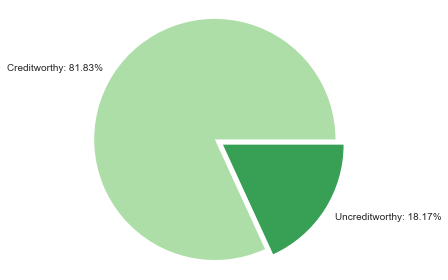

In [65]:
sums = df_raw.Class_new.groupby(df_raw.Class_new).value_counts()

colors = sns.color_palette("Greens", n_colors=2, desat=1)

explode=(0.04, 0.04)
plt.pie([count[0], count[1]], labels=['Creditworthy: 81.83%', 'Uncreditworthy: 18.17%'],\
       explode=explode, colors=colors)
plt.axis('equal')
plt.tight_layout()

The dataset is unbalanced, with uncreditworthy observations only accounting for 18.17%.

The unbalanced nature of the data will have to be considered when making predictions.

In [66]:
# what is the link between loan purpose and creditworthiness?

table = pd.pivot_table(df_raw, values='Loan Amount', index='Loan Purpose', \
                        columns='Class_new', aggfunc='count').fillna(0)
table.columns = ['good', 'bad']
table['Sum'] = table['good'] + table['bad']
table['percent_good'] = table['good']/table['Sum']*100
table['percent_bad'] = table['bad']/table['Sum']*100

table.drop(table.columns[[0, 1, 2]], axis=1, inplace=True)
table = table[1: :]


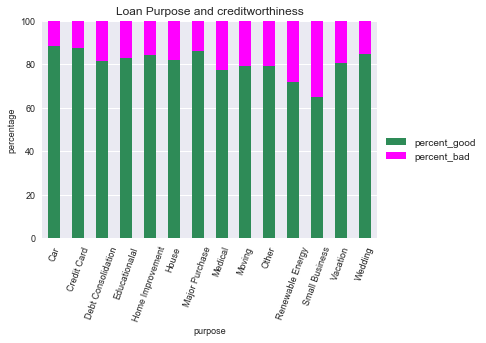

In [67]:
colors = ('seagreen','magenta')
ax= table.plot(legend=False, kind='bar',stacked=True, ylim=(0,100), color=colors, fontsize=9,\
                title='Loan Purpose and creditworthiness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax.set_xticklabels(table.index, rotation=70)
ax.set_xlabel('purpose', fontsize=9)
ax.set_ylabel('percentage', fontsize=9)

In [68]:
# what is the link between home ownership and creditworthiness?

table1 = pd.pivot_table(df_raw, values='Loan Amount', index='Home Ownership', \
                        columns='Class_new', aggfunc='count').fillna(0)
table1.columns = ['good', 'bad']
table1['Sum'] = table1['good'] + table1['bad']
table1['percent_good'] = table1['good']/table1['Sum']*100
table1['percent_bad'] = table1['bad']/table1['Sum']*100

table1.drop(table1.columns[[0, 1, 2]], axis=1, inplace=True)
table1 = table1.iloc[1: :]
table1

,percent_good,percent_bad
Home Ownership,,
NOne,100.000000,0.000000
OTHER,82.653061,17.346939
OWN,81.030213,18.969787
RENT,80.452830,19.547170


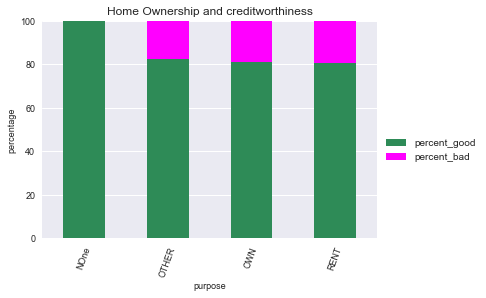

In [69]:
colors = ('seagreen','magenta')
ax1= table1.plot(legend=False, kind='bar',stacked=True, ylim=(0,100), color=colors, fontsize=9,\
                title='Home Ownership and creditworthiness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax1.set_xticklabels(table1.index, rotation=70)
ax1.set_xlabel('purpose', fontsize=9)
ax1.set_ylabel('percentage', fontsize=9)

In [70]:
#How is loan performance related to address state?

table2 = pd.pivot_table(df_raw, values='Loan Amount', index='Address State', columns=['Class_new'], aggfunc='count').fillna(0)
table2.columns=[['good', 'bad']]
table2['Sum']=table2['good']+table2['bad']
table2['%good']=table2['good']/table2['Sum']*100
table2['%bad']=table2['bad']/table2['Sum']*100
table2.index = table2.index.astype(str)
table2['above mean'] = table2['%bad'] - table2['%bad'].mean()  
print(table2)

                 good    bad     Sum       %good       %bad  above mean
Address State                                                          
AK               49.0    8.0    57.0   85.964912  14.035088   -2.501998
AL              240.0   45.0   285.0   84.210526  15.789474   -0.747612
AR              132.0   18.0   150.0   88.000000  12.000000   -4.537086
AZ              487.0  112.0   599.0   81.302170  18.697830    2.160744
CA             3552.0  933.0  4485.0   79.197324  20.802676    4.265590
CO              431.0   81.0   512.0   84.179688  15.820312   -0.716773
CT              390.0   78.0   468.0   83.333333  16.666667    0.129581
DC              127.0   11.0   138.0   92.028986   7.971014   -8.566071
DE               61.0   11.0    72.0   84.722222  15.277778   -1.259308
FL             1328.0  413.0  1741.0   76.278001  23.721999    7.184913
GA              694.0  181.0   875.0   79.314286  20.685714    4.148629
HI               89.0   21.0   110.0   80.909091  19.090909    2

In [71]:
#Plot bad loans on map

import plotly.plotly as py
py.sign_in('Son17', 'GGwvotqQmpBq2zCu1w46')

data = [ dict(
        type='choropleth',
        colorscale = 'husl',
        autocolorscale = False,
        locations = table2.index,
        z = table2['%bad'].astype(float).round(2),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(title = "Portion of uncreditworthy loans (%)"))]

layout = dict(
        title = 'Uncreditworthy loans by state (%)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),)
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Son17/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [72]:
#Plot bad loans on map

import plotly.plotly as py
py.sign_in('Son17', 'GGwvotqQmpBq2zCu1w46')

data = [ dict(
        type='choropleth',
        colorscale = 'husl',
        autocolorscale = False,
        locations = table2.index,
        z = table2['Sum'].astype(float).round(2),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(title = "Number of uncreditworthy loans"))]

layout = dict(
        title = 'Uncreditworthy loans by state in absolute numbers',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),)
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Son17/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [73]:
# what is the link between No. Of Public Record Bankruptcies and creditworthiness?

table3 = pd.pivot_table(df_raw, values='Loan Amount', index='No. Of Public Record Bankruptcies', \
                        columns='Class_new', aggfunc='count').fillna(0)
table3.columns = ['good', 'bad']
table3['Sum'] = table3['good'] + table3['bad']
table3['percent_good'] = table3['good']/table3['Sum']*100
table3['percent_bad'] = table3['bad']/table3['Sum']*100

table3.drop(table3.columns[[0, 1, 2]], axis=1, inplace=True)
table3 = table3.iloc[0: :]
table3

,percent_good,percent_bad
No. Of Public Record Bankruptcies,,
None,82.165096,17.834904
One,73.878365,26.121635
Two,80.000000,20.000000


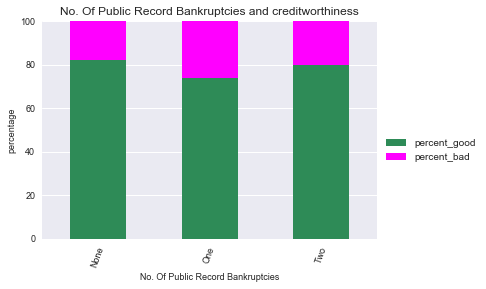

In [74]:
colors = ('seagreen','magenta')
ax3= table3.plot(legend=False, kind='bar',stacked=True, ylim=(0,100), color=colors, fontsize=9,\
                title='No. Of Public Record Bankruptcies and creditworthiness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax3.set_xticklabels(table3.index, rotation=70)
ax3.set_xlabel('No. Of Public Record Bankruptcies', fontsize=9)
ax3.set_ylabel('percentage', fontsize=9)

In [75]:
# what is the link between FICO Credit Score and creditworthiness?

table4 = pd.pivot_table(df_raw, values='Loan Amount', index='FICO Credit Score', \
                        columns='Class_new', aggfunc='count').fillna(0)
table4.columns = ['good', 'bad']
table4['Sum'] = table4['good'] + table4['bad']
table4['percent_good'] = table4['good']/table4['Sum']*100
table4['percent_bad'] = table4['bad']/table4['Sum']*100

table4.drop(table4.columns[[0, 1, 2]], axis=1, inplace=True)
table4 = table4.iloc[0: :]
table4.head()

,percent_good,percent_bad
FICO Credit Score,,
625.0,100.000000,0.000000
630.0,100.000000,0.000000
660.0,71.138211,28.861789
665.0,71.714534,28.285466
670.0,73.128120,26.871880


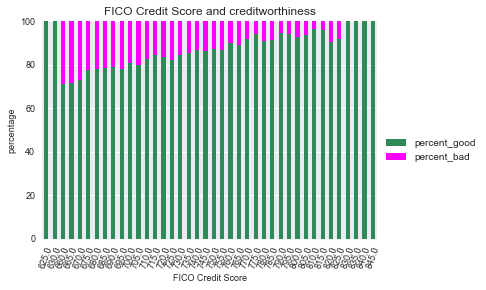

In [76]:
colors = ('seagreen','magenta')
ax4= table4.plot(legend=False, kind='bar',stacked=True, ylim=(0,100), color=colors, fontsize=9,\
                title='FICO Credit Score and creditworthiness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax4.set_xticklabels(table4.index, rotation=70)
ax4.set_xlabel('FICO Credit Score', fontsize=9)
ax4.set_ylabel('percentage', fontsize=9)

In [77]:
# what is the link between No. Adverse Public Records and creditworthiness?

table5 = pd.pivot_table(df_raw, values='Loan Amount', index='No. Adverse Public Records', \
                        columns='Class_new', aggfunc='count').fillna(0)
table5.columns = ['good', 'bad']
table5['Sum'] = table5['good'] + table5['bad']
table5['percent_good'] = table5['good']/table5['Sum']*100
table5['percent_bad'] = table5['bad']/table5['Sum']*100

table5.drop(table5.columns[[0, 1, 2]], axis=1, inplace=True)
table5 = table5.iloc[0: :]
table5.head()

,percent_good,percent_bad
No. Adverse Public Records,,
Four,100.000000,0.000000
None,82.315619,17.684381
One,72.763578,27.236422
Three,100.000000,0.000000
Two,75.757576,24.242424


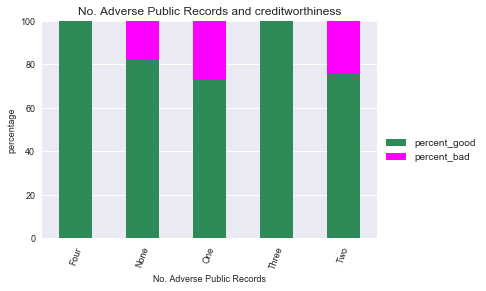

In [78]:
colors = ('seagreen','magenta')
ax5= table5.plot(legend=False, kind='bar',stacked=True, ylim=(0,100), color=colors, fontsize=9,\
                title='No. Adverse Public Records and creditworthiness')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax5.set_xticklabels(table5.index, rotation=70)
ax5.set_xlabel('No. Adverse Public Records', fontsize=9)
ax5.set_ylabel('percentage', fontsize=9)

# Data preprocessing

In [79]:
# summarise address states into geographic regions

East_Coast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'PA', 'NJ', 'DE', 'MD', 'VA', 'PA', 'DC']
West_Coast = ['CA']
North = ['WA', 'OR', 'ID', 'MT', 'WY', 'SD','MN', 'WI', 'MI', 'AK']
South = ['AZ', 'NM', 'TX', 'OK', 'LA', 'AR', 'MS', 'AL', 'GA', 'FL', 'SC', 'NC', 'TN', 'HI']
Middle = ['NV', 'UT', 'CO', 'KS', 'NE', 'IA', 'MO', 'IL', 'IN', 'KY', 'WV', 'OH']

In [80]:
df_raw['Address State'] = df_raw['Address State'].replace(East_Coast, 'East_Coast')
df_raw['Address State'] = df_raw['Address State'].replace(West_Coast, 'West_Coast')
df_raw['Address State'] = df_raw['Address State'].replace(North, 'North')
df_raw['Address State'] = df_raw['Address State'].replace(South, 'South')
df_raw['Address State'] = df_raw['Address State'].replace(Middle, 'Middle') 

df_raw['Address State'].value_counts()

East_Coast    7731
South         6885
West_Coast    4485
Middle        3461
North         2213
Name: Address State, dtype: int64

In [81]:
# summarise FICO scores into categories

def summarise(fico):
    if 300 >= fico < 579:
        return 'Very Poor'
    if 580 >= fico < 669:
        return 'Fair'
    if 670 >= fico < 739:
        return 'Good'
    if 740 >= fico < 799:
        return 'Very Good'
    if 800 >= fico <= 850:
        return 'Exceptional'

In [82]:
df_raw['FICO Credit Score'] = df_raw['FICO Credit Score'].apply(summarise)
df_raw['FICO Credit Score'].value_counts()

Very Good      15950
Exceptional     5208
Good            3337
Name: FICO Credit Score, dtype: int64

In [83]:
# create dummy variables for categorical data

df_raw = pd.get_dummies(df_raw, columns=['Loan Term','Home Ownership', 'Loan Purpose', \
                                         'FICO Credit Score','Address State'])

In [84]:
# encode remaining columns containing object data types

from sklearn import preprocessing 

cols = ['No. Delinquencies In Last 2 Years', 'No. Adverse Public Records',\
           'No. Of Public Record Bankruptcies']

le = preprocessing.LabelEncoder()

def labelencoder(input):
    if input == 'None':
        return 0
    elif input == 'One':
        return 1
    elif input == 'Two':
        return 2
    elif input == 'Three':
        return 3
    elif input == 'Four':
        return 4
    elif input == 'Five':
        return 5
    elif input == 'Six':
        return 6
    elif input == 'Seven':
        return 7
    elif input == 'Eight':
        return 8
    elif input == 'Nine':
        return 9
    else:
        return input

for c in cols:    
    df_raw[c] = df_raw[c].apply(labelencoder)


In [85]:
# drop redundant feature

df_raw.drop('Class', axis=1, inplace=True)

In [86]:
# let's have a look a the preprocessed data:

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 46 columns):
Loan Amount                          24776 non-null int64
Employment Length                    24776 non-null float64
Annual Income                        24776 non-null float64
Debt To Income Ratio                 24775 non-null float64
No. Delinquencies In Last 2 Years    24775 non-null float64
Earliest Credit Line Opened          24776 non-null float64
No. Inquiries In Last 6 Months       24775 non-null float64
Months Since Last Delinquency        24776 non-null int64
No. Of Credit Lines                  24775 non-null float64
No. Adverse Public Records           24775 non-null float64
Total Credit Balance                 24775 non-null float64
Use Of Credit Line                   24724 non-null float64
Total Number Of Credit Lines         24775 non-null float64
Loan Application Description         24776 non-null int64
No. Of Public Record Bankruptcies    24776 non-null int64

# Define target

In [87]:
# Define X and y

y = df_raw['Class_new']
y.columns = ['Class']
X = df_raw.drop(['Class_new'], axis=1)

# Address correlated features

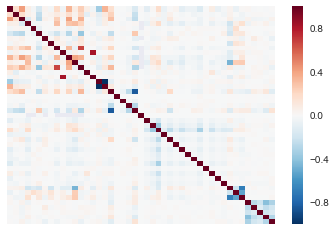

In [88]:
corr = X.corr()
sns.heatmap(corr, xticklabels='', yticklabels='')

In [89]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)
    

In [90]:
correlation(X, 0.6)

       Loan Amount  Employment Length  Annual Income  Debt To Income Ratio  \
0            25000                0.5        85000.0                 19.48   
1             7000                0.5        65000.0                 14.29   
2             1200               10.0        54000.0                  5.47   
3            10800                6.0        32000.0                 11.63   
4             7500                3.0        85000.0                  8.10   
5             3000                3.0        80800.0                 14.97   
6             4000                0.5       148000.0                 16.98   
7             5600                1.0        45000.0                  4.00   
8             3200                5.0        54000.0                  6.51   
9             4000                0.5        60000.0                 11.08   
10            5000               10.0        90000.0                 17.25   
11            2525                3.0        27000.0            

# Addressing sparsity of data

#there may be some columns with more than one unique values but one of the values has #insignificant frequency in the dataset. Let’s find out and drop such column(s):

for col in loans_2007.columns:
    if (len(loans_2007[col].unique()) < 4):
        print(loans_2007[col].value_counts())
        print()


In [91]:
# drop those columns with less than 4 values

In [92]:
X_new = X.fillna(X.median())

In [93]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 43 columns):
Loan Amount                          24776 non-null int64
Employment Length                    24776 non-null float64
Annual Income                        24776 non-null float64
Debt To Income Ratio                 24776 non-null float64
No. Delinquencies In Last 2 Years    24776 non-null float64
Earliest Credit Line Opened          24776 non-null float64
No. Inquiries In Last 6 Months       24776 non-null float64
Months Since Last Delinquency        24776 non-null int64
No. Of Credit Lines                  24776 non-null float64
No. Adverse Public Records           24776 non-null float64
Total Credit Balance                 24776 non-null float64
Use Of Credit Line                   24776 non-null float64
Loan Application Description         24776 non-null int64
Loan Term_36 Months                  24776 non-null uint8
Loan Term_60 Months                  24776 non-null uint8
H

In [94]:
# train test split
# stratify target y as it may not be normally distributed

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42,\
                                                    stratify=y)

# Build model

In [97]:
# Build logistic regression model

from sklearn import linear_model
from sklearn.metrics import roc_auc_score

regr = linear_model.LogisticRegression(random_state=42, class_weight={0:0.1817, 1:0.8183})
regr.fit(X_train, y_train)

y_pred_regr = regr.predict(X_test)

In [98]:
# Assess benchmark model performance using area under the curve (AUC)

from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(y_test, y_pred_regr)
print("The AUC score for a simple Logistic Regression model is {:.4f}.".format(AUC))

The AUC score for a simple Logistic Regression model is 0.6488.


# Optimise model

In [99]:
# Tuning hyperparameters - logistic regression

from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.1,0.2,0.3,0.4,0.5,0.6], 'penalty': ['l1','l2']}
             
gsregr = GridSearchCV(regr, param_grid, cv=11)
    
gsregr.fit(X_train, y_train)

gsregr_pred = gsregr.predict(X_test) 

AUC = roc_auc_score(y_test, gsregr_pred)
print("The AUC score for the optimized logistic regression model is {:.4f}.".format(AUC))

The AUC score for the optimized logistic regression model is 0.6529.


In [100]:
print(gsregr.best_params_)

{'penalty': 'l1', 'C': 0.4}


In [101]:
# View the best parameters for the model found using grid search

print('Best C:',gsregr.best_estimator_) 


Best C: LogisticRegression(C=0.4, class_weight={0: 0.1817, 1: 0.8183}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


# ROC curve

In [102]:
from sklearn.metrics import roc_curve

probs = gsregr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
AUC = roc_auc_score(y_test, y_pred_regr)

In [103]:

preds2 = probs.iloc[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test, preds2)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

NameError: name 'fpr2' is not defined

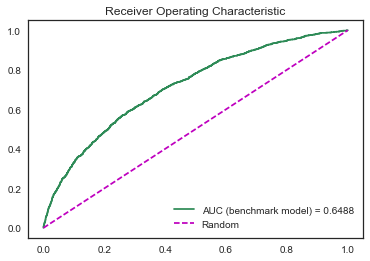

In [104]:
sns.set_style("white")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'seagreen', label='AUC (benchmark model) = %0.4f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'m--', label='Random')
plt.legend(loc = 'lower right')
plt.plot(fpr2, tpr2, 'navy', label='AUC (final model) = 0.9871')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Confusion matrix

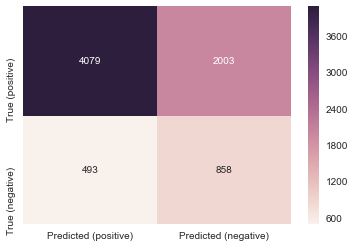

In [105]:
from sklearn.metrics import confusion_matrix

pred_values = gsregr.predict(X_test)

cm = confusion_matrix(y_test, pred_values)

df_cm = pd.DataFrame(cm, index = ['True (positive)', 'True (negative)'])
df_cm.columns = ['Predicted (positive)', 'Predicted (negative)']

sns.heatmap(df_cm, annot=True, fmt="d")

true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
•true negatives (TN): We predicted no, and they don't have the disease.
•false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
•false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")


What can be calculated from a confusion matrix?

Accuracy: Overall, how often is the classifier correct? ◦(TP+TN)/total = (100+50)/165 = 0.91

•Misclassification Rate: Overall, how often is it wrong? ◦(FP+FN)/total = (10+5)/165 = 0.09
◦equivalent to 1 minus Accuracy
◦also known as "Error Rate"

•True Positive Rate: When it's actually yes, how often does it predict yes? ◦TP/actual yes = 100/105 = 0.95
◦also known as "Sensitivity" or "Recall"

•False Positive Rate: When it's actually no, how often does it predict yes? ◦FP/actual no = 10/60 = 0.17

•Specificity: When it's actually no, how often does it predict no? ◦TN/actual no = 50/60 = 0.83
◦equivalent to 1 minus False Positive Rate

•Precision: When it predicts yes, how often is it correct? ◦TP/predicted yes = 100/110 = 0.91

•Prevalence: How often does the yes condition actually occur in our sample? ◦actual yes/total = 105/165 = 0.64

